<a href="https://colab.research.google.com/github/danielavinayc/Colab/blob/main/TECNOLOGIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.forbes.com.mx/tecnologia-empresas-tecnologicas-grandes-mundo-apple-liderando/

#APPLE

In [5]:
from google.colab import files
import io as io
upload=files.upload()

Saving AAPL.csv to AAPL.csv


In [1]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization

In [6]:
apple = pd.read_csv('AAPL.csv')

In [73]:
apple.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,39.625000,40.972500,39.377499,40.677502,38.778717,243278000
1,2018-02-13,40.487499,41.187500,40.412498,41.084999,39.167202,130196800
2,2018-02-14,40.759998,41.884998,40.720001,41.842499,39.889332,162579600
3,2018-02-15,42.447498,43.272499,42.250000,43.247501,41.228760,204588800
4,2018-02-16,43.090000,43.705002,42.942501,43.107498,41.095284,160704400


In [74]:
apple.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2023-02-06,152.570007,153.100006,150.779999,151.729996,151.498688,69858300
1255,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1256,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
1257,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
1258,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100


In [2]:
import seaborn as sb

In [76]:
apple.shape

(1259, 7)

In [77]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,100.179615,101.412431,99.011517,100.263872,98.882222,1.150375e+08
std,45.943766,46.541443,45.339500,45.963620,46.264026,5.407291e+07
min,35.994999,36.430000,35.500000,35.547501,34.257278,3.519590e+07
25%,52.106251,52.372500,51.683750,52.121250,50.346374,7.880765e+07
50%,109.660004,111.637497,107.892502,109.665001,107.818214,1.005660e+08
75%,143.359993,145.019996,141.680000,143.339996,142.737068,1.350912e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,4.265100e+08


In [78]:
apple["Adj Close"].describe()

count    1259.000000
mean       98.882222
std        46.264026
min        34.257278
25%        50.346374
50%       107.818214
75%       142.737068
max       180.683868
Name: Adj Close, dtype: float64

Importamos biblioteca para poder hacer regresion lineal

In [3]:
from sklearn.linear_model import LinearRegression

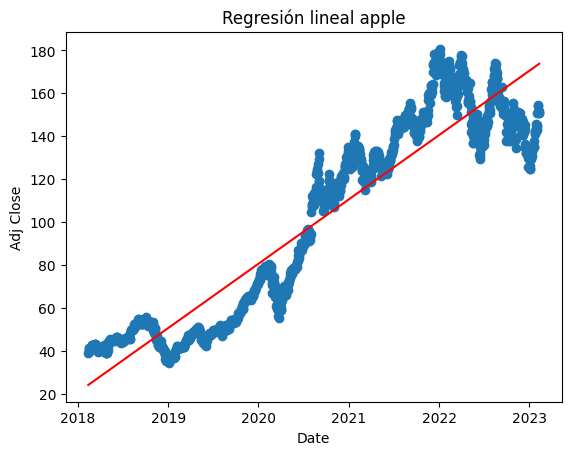

In [80]:
# crear la matriz de características X y la variable objetivo y
X = pd.to_datetime(apple['Date']).apply(lambda x: x.toordinal())
y = apple['Adj Close']

# ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# obtener los coeficientes de la regresión
coef = model.coef_
intercept = model.intercept_

# graficar la línea de la regresión junto con los puntos originales del DataFrame
plt.scatter(pd.to_datetime(apple['Date']), y)
plt.plot(pd.to_datetime(apple['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal apple')
plt.show()

El valor de “a” (que puede ser negativo, positivo o igual a cero) es llamado el intercepto; en tanto que el valor de “b” (el cual puede ser negativo o positivo) se denomina la pendiente o coeficiente de regresión.

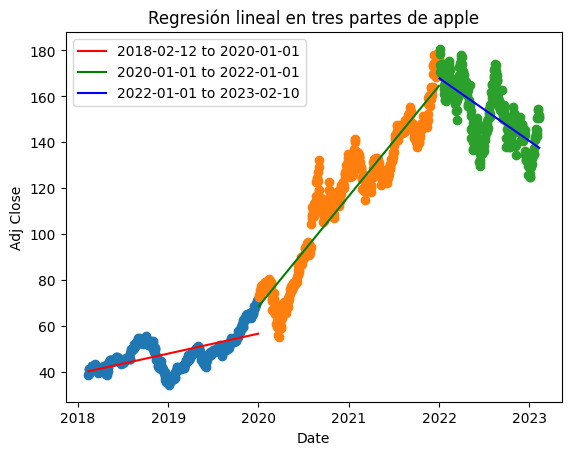

In [82]:
# crear los tres subconjuntos del DataFrame
apple1 = apple.loc[(apple['Date'] >= '2018-02-12') & (apple['Date'] <= '2020-01-01')]
apple2 = apple.loc[(apple['Date'] > '2020-01-01') & (apple['Date'] <= '2022-01-01')]
apple3 = apple.loc[(apple['Date'] > '2022-01-01') & (apple['Date'] <= '2023-02-10')]

# crear las matrices de características X y la variable objetivo y para cada subconjunto
X1 = pd.to_datetime(apple1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(apple2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(apple3['Date']).apply(lambda x: x.toordinal())

y1 = apple1['Adj Close']
y2 = apple2['Adj Close']
y3 = apple3['Adj Close']

# ajustar el modelo de regresión lineal para cada subconjunto
model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

# obtener los coeficientes de cada regresión
coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

# graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto
plt.scatter(pd.to_datetime(apple1['Date']), y1)
plt.plot(pd.to_datetime(apple1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(apple2['Date']), y2)
plt.plot(pd.to_datetime(apple2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(apple3['Date']), y3)
plt.plot(pd.to_datetime(apple3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de apple')
plt.legend()
plt.show()

Ver la tendencia antes durente y despues de la pandemia

In [83]:
apple['Date'] = pd.to_datetime(apple['Date'])

# Obtener la fecha en la que se alcanzó el valor máximo de Adj Close
max_date = apple.loc[apple['Adj Close'].idxmax()]['Date']

# Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close
min_date = apple.loc[apple['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2022-01-03 00:00:00
Fecha de mínimo Adj Close: 2019-01-03 00:00:00


Ver cual fue el pico y el valle mas importante y luego investigo que paso durante esas fechas

#SAMSUNG

In [7]:
from google.colab import files
import io as io
upload=files.upload()

Saving Samsung.csv to Samsung.csv


In [8]:
samsung = pd.read_csv('Samsung.csv')

In [86]:
samsung.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,45100.0,46320.0,45040.0,45720.0,39424.046875,15754950
1,2018-02-13,46200.0,48060.0,46200.0,47540.0,40993.421875,18923250
2,2018-02-14,48080.0,49100.0,47940.0,49000.0,42252.367188,18905900
3,2018-02-19,49800.0,49800.0,47860.0,48380.0,41717.750000,15353450
4,2018-02-20,48040.0,48160.0,47220.0,47400.0,40872.703125,10122600


In [87]:
samsung.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1224,2023-02-06,62800.0,63000.0,61600.0,61600.0,61600.0,144104
1225,2023-02-07,61900.0,62500.0,61600.0,62000.0,62000.0,32873
1226,2023-02-08,62800.0,63300.0,62400.0,63100.0,63100.0,42558
1227,2023-02-09,63000.0,63300.0,62300.0,63300.0,63300.0,48035
1228,2023-02-10,62600.0,63000.0,62400.0,62900.0,62900.0,44786


In [88]:
samsung.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1.229000e+03
mean,59067.925142,59611.464605,58506.175753,59040.496338,55479.958233,1.535770e+07
std,13228.356338,13299.535552,13149.384531,13196.271541,14180.784964,8.414853e+06
min,37450.000000,37600.000000,36850.000000,37450.000000,33325.488281,0.000000e+00
25%,47250.000000,47560.000000,46700.000000,47200.000000,42018.222656,1.007568e+07
50%,56700.000000,57400.000000,56100.000000,56600.000000,54080.054688,1.368621e+07
75%,70200.000000,70500.000000,69700.000000,70100.000000,68156.156250,1.829743e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,87219.476563,9.030618e+07


In [89]:
samsung["Adj Close"].describe()

count     1229.000000
mean     55479.958233
std      14180.784964
min      33325.488281
25%      42018.222656
50%      54080.054688
75%      68156.156250
max      87219.476563
Name: Adj Close, dtype: float64

In [90]:
samsung.shape

(1229, 7)

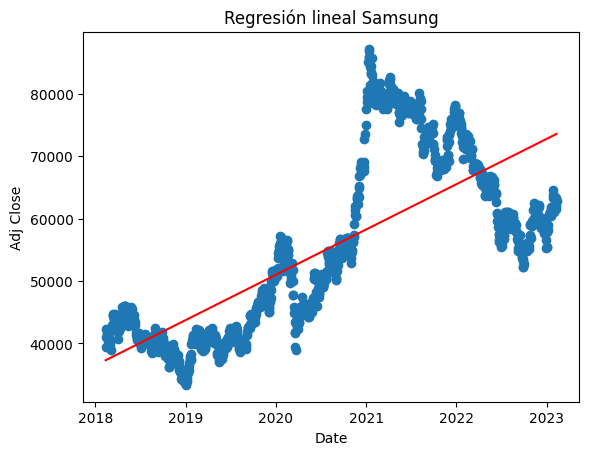

In [91]:
# crear la matriz de características X y la variable objetivo y
X = pd.to_datetime(samsung['Date']).apply(lambda x: x.toordinal())
y = samsung['Adj Close']

# ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

# obtener los coeficientes de la regresión
coef = model.coef_
intercept = model.intercept_

# graficar la línea de la regresión junto con los puntos originales del DataFrame
plt.scatter(pd.to_datetime(samsung['Date']), y)
plt.plot(pd.to_datetime(samsung['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Samsung')
plt.show()

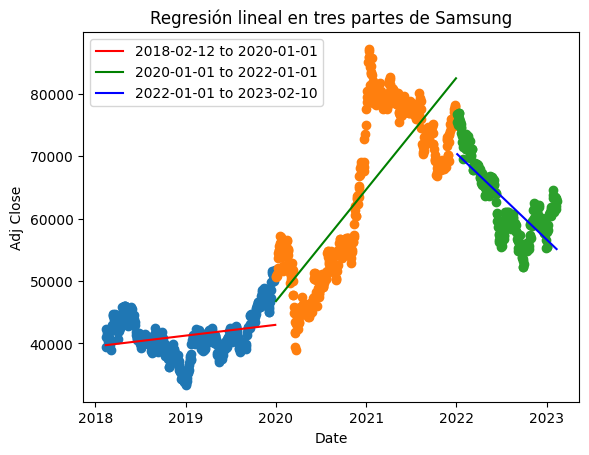

In [92]:
# crear los tres subconjuntos del DataFrame
samsung1 = samsung.loc[(samsung['Date'] >= '2018-02-12') & (samsung['Date'] <= '2020-01-01')]
samsung2 = samsung.loc[(samsung['Date'] > '2020-01-01') & (samsung['Date'] <= '2022-01-01')]
samsung3 = samsung.loc[(samsung['Date'] > '2022-01-01') & (samsung['Date'] <= '2023-02-10')]

# crear las matrices de características X y la variable objetivo y para cada subconjunto
X1 = pd.to_datetime(samsung1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(samsung2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(samsung3['Date']).apply(lambda x: x.toordinal())

y1 = samsung1['Adj Close']
y2 = samsung2['Adj Close']
y3 = samsung3['Adj Close']

# ajustar el modelo de regresión lineal para cada subconjunto
model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

# obtener los coeficientes de cada regresión
coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

# graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto
plt.scatter(pd.to_datetime(samsung1['Date']), y1)
plt.plot(pd.to_datetime(samsung1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(samsung2['Date']), y2)
plt.plot(pd.to_datetime(samsung2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(samsung3['Date']), y3)
plt.plot(pd.to_datetime(samsung3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de Samsung')
plt.legend()
plt.show()


In [93]:
samsung['Date'] = pd.to_datetime(samsung['Date'])

# Obtener la fecha en la que se alcanzó el valor máximo de Adj Close
max_date = samsung.loc[samsung['Adj Close'].idxmax()]['Date']

# Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close
min_date = samsung.loc[samsung['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2021-01-11 00:00:00
Fecha de mínimo Adj Close: 2019-01-04 00:00:00


#Alphabet

In [9]:
from google.colab import files
import io as io
upload=files.upload()

Saving Alphabet.csv to Alphabet.csv


In [10]:
alphabet = pd.read_csv('Alphabet.csv')

In [96]:
alphabet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,52.400002,53.075001,52.046398,52.597000,52.597000,41154000
1,2018-02-13,52.250000,52.918499,52.204350,52.605000,52.605000,25302000
2,2018-02-14,52.447498,53.585999,52.337502,53.485001,53.485001,31116000
3,2018-02-15,53.953499,54.573952,53.216999,54.476002,54.476002,36868000
4,2018-02-16,54.420502,55.233501,54.415649,54.740002,54.740002,33590000


In [97]:
alphabet.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-02-03,103.510002,108.019997,103.300003,105.220001,105.220001,36823400
1254,2023-02-06,102.684998,104.699997,102.209999,103.470001,103.470001,25573000
1255,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800
1256,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000
1257,2023-02-09,100.540001,100.610001,93.860001,95.459999,95.459999,97798600


In [98]:
alphabet.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,86.819786,87.815253,85.883411,86.861749,86.861749,3.086285e+07
std,30.997579,31.301294,30.656363,30.967351,30.967351,1.340035e+07
min,48.695000,50.176998,48.505501,48.811001,48.811001,6.936000e+06
25%,58.999625,59.527124,58.387699,59.086499,59.086499,2.232650e+07
50%,75.319252,76.115501,74.719002,75.637749,75.637749,2.754000e+07
75%,113.282623,114.807499,112.140499,113.340628,113.340628,3.521750e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.241400e+08


In [99]:
alphabet["Adj Close"].describe()

count    1258.000000
mean       86.861749
std        30.967351
min        48.811001
25%        59.086499
50%        75.637749
75%       113.340628
max       150.709000
Name: Adj Close, dtype: float64

In [100]:
alphabet.shape

(1258, 7)

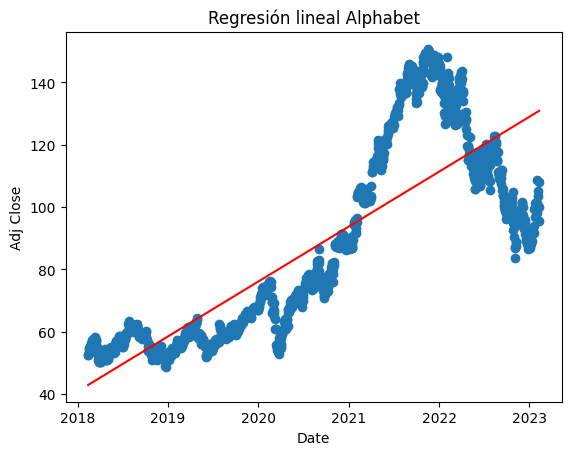

In [101]:
#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(alphabet['Date']).apply(lambda x: x.toordinal())
y = alphabet['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(alphabet['Date']), y)
plt.plot(pd.to_datetime(alphabet['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Alphabet')
plt.show()

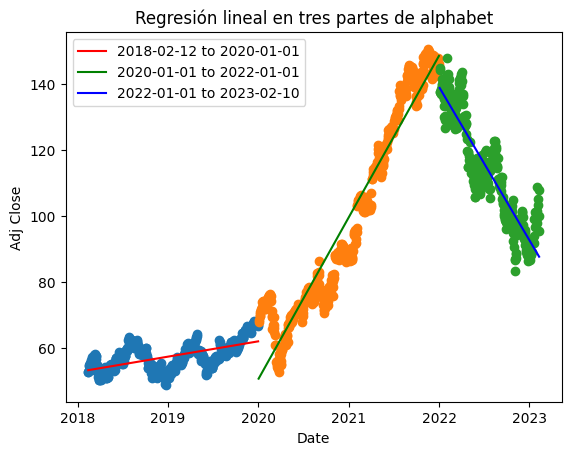

In [102]:
#crear los tres subconjuntos del DataFrame

alphabet1 = alphabet.loc[(alphabet['Date'] >= '2018-02-12') & (alphabet['Date'] <= '2020-01-01')]
alphabet2 = alphabet.loc[(alphabet['Date'] > '2020-01-01') & (alphabet['Date'] <= '2022-01-01')]
alphabet3 = alphabet.loc[(alphabet['Date'] > '2022-01-01') & (alphabet['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(alphabet1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(alphabet2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(alphabet3['Date']).apply(lambda x: x.toordinal())

y1 = alphabet1['Adj Close']
y2 = alphabet2['Adj Close']
y3 = alphabet3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(alphabet1['Date']), y1)
plt.plot(pd.to_datetime(alphabet1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(alphabet2['Date']), y2)
plt.plot(pd.to_datetime(alphabet2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(alphabet3['Date']), y3)
plt.plot(pd.to_datetime(alphabet3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de alphabet')
plt.legend()
plt.show()

In [103]:
alphabet['Date'] = pd.to_datetime(alphabet['Date'])

# Obtener la fecha en la que se alcanzó el valor máximo de Adj Close
max_date = alphabet.loc[alphabet['Adj Close'].idxmax()]['Date']

# Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close
min_date = alphabet.loc[alphabet['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2021-11-18 00:00:00
Fecha de mínimo Adj Close: 2018-12-24 00:00:00


#Microsoft

In [11]:
from google.colab import files
import io as io
upload=files.upload()

Saving MSFT.csv to MSFT.csv


In [12]:
msft = pd.read_csv('MSFT.csv')

In [106]:
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,88.739998,89.779999,87.930000,89.129997,83.725319,35720300
1,2018-02-13,88.930000,90.000000,87.800003,89.830002,84.382896,26407700
2,2018-02-14,88.510002,90.989998,88.410004,90.809998,85.704170,34960900
3,2018-02-15,91.209999,92.720001,90.620003,92.660004,87.450172,27823900
4,2018-02-16,92.449997,93.500000,91.800003,92.000000,86.827263,30596900


In [107]:
msft.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-02-03,259.540009,264.200012,257.100006,258.350006,257.704529,29077300
1254,2023-02-06,257.440002,258.299988,254.779999,256.769989,256.128448,22518000
1255,2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400
1256,2023-02-08,273.200012,276.760010,266.209991,266.730011,266.063599,54686000
1257,2023-02-09,273.799988,273.980011,262.799988,263.619995,262.961365,42375100


In [108]:
msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,197.207401,199.297822,195.004348,197.251924,193.142572,3.023132e+07
std,73.314718,74.084110,72.486254,73.320750,74.078340,1.281420e+07
min,87.849998,89.779999,87.080002,87.180000,82.278275,8.989200e+06
25%,126.402500,127.447498,124.964999,126.187500,121.529356,2.221248e+07
50%,207.209999,210.050003,204.375000,206.750000,201.847397,2.709185e+07
75%,257.255005,259.852501,253.482498,256.660004,253.909443,3.430212e+07
max,344.619995,349.670013,342.200012,343.109985,339.075562,1.112421e+08


In [109]:
msft["Adj Close"].describe()

count    1258.000000
mean      193.142572
std        74.078340
min        82.278275
25%       121.529356
50%       201.847397
75%       253.909443
max       339.075562
Name: Adj Close, dtype: float64

In [110]:
msft.shape

(1258, 7)

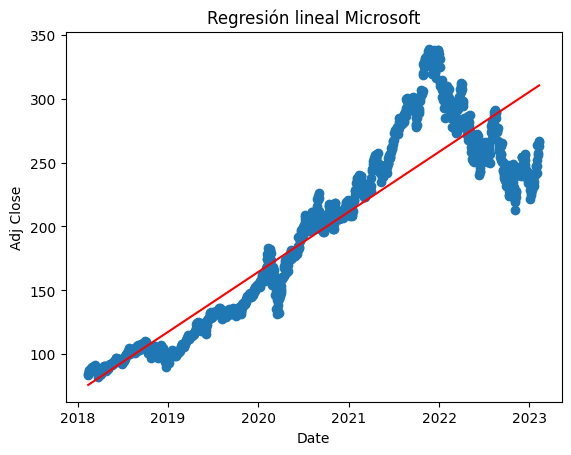

In [111]:
#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(msft['Date']).apply(lambda x: x.toordinal())
y = msft['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(msft['Date']), y)
plt.plot(pd.to_datetime(msft['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Microsoft')
plt.show()

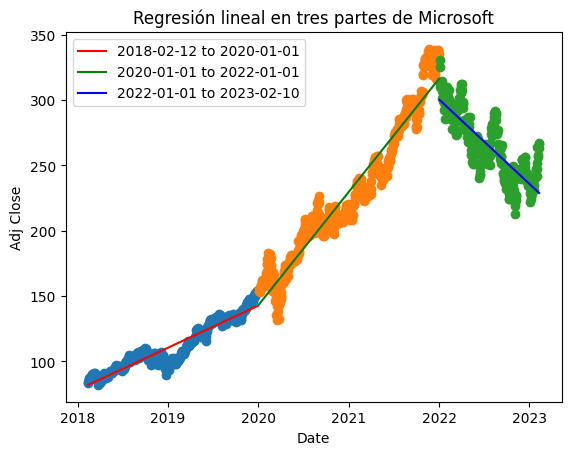

In [112]:
#crear los tres subconjuntos del DataFrame

msft1 = msft.loc[(msft['Date'] >= '2018-02-12') & (msft['Date'] <= '2020-01-01')]
msft2 = msft.loc[(msft['Date'] > '2020-01-01') & (msft['Date'] <= '2022-01-01')]
msft3 = msft.loc[(msft['Date'] > '2022-01-01') & (msft['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(msft1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(msft2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(msft3['Date']).apply(lambda x: x.toordinal())

y1 = msft1['Adj Close']
y2 = msft2['Adj Close']
y3 = msft3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(msft1['Date']), y1)
plt.plot(pd.to_datetime(msft1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(msft2['Date']), y2)
plt.plot(pd.to_datetime(msft2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(msft3['Date']), y3)
plt.plot(pd.to_datetime(msft3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de Microsoft')
plt.legend()
plt.show()

In [113]:
msft['Date'] = pd.to_datetime(msft['Date'])

# Obtener la fecha en la que se alcanzó el valor máximo de Adj Close
max_date = msft.loc[msft['Adj Close'].idxmax()]['Date']

# Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close
min_date = msft.loc[msft['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2021-11-19 00:00:00
Fecha de mínimo Adj Close: 2018-03-23 00:00:00


# IMB

In [13]:
from google.colab import files
import io as io
upload=files.upload()

Saving IBM.csv to IBM.csv


In [14]:
ibm = pd.read_csv('IBM.csv')

In [12]:
ibm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,144.263855,145.697891,143.690247,144.741867,113.618546,6151944
1,2018-02-13,144.263855,144.531555,143.059280,144.120453,113.130722,5115986
2,2018-02-14,143.585083,148.183563,143.403442,147.954117,116.140076,5731034
3,2018-02-15,148.661575,149.961761,146.940720,149.149139,117.078133,5882286
4,2018-02-16,148.862335,150.850861,148.843216,149.311661,117.205688,4479913


In [13]:
ibm.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-02-03,136.350006,136.949997,135.529999,136.940002,135.278351,3755700
1254,2023-02-06,135.830002,136.320007,134.949997,136.179993,134.527573,4841300
1255,2023-02-07,135.669998,136.399994,134.449997,135.839996,134.191696,3737600
1256,2023-02-08,135.710007,136.740005,135.160004,135.979996,134.330002,4593700
1257,2023-02-09,134.990005,135.729996,133.339996,133.750000,133.750000,3918800


In [14]:
ibm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,129.647540,130.816619,128.482234,129.654227,114.316500,5.155103e+06
std,10.654018,10.511028,10.772025,10.648655,12.390531,3.139771e+06
min,90.439774,93.441681,86.577438,90.602295,77.948761,1.257397e+06
25%,121.240440,122.221552,119.846536,121.140057,106.476366,3.451434e+06
50%,130.989486,132.270554,129.974998,131.168174,111.959980,4.357374e+06
75%,137.380493,138.373566,136.267990,137.387622,123.763481,5.722457e+06
max,153.126190,154.980881,152.619507,153.833649,148.742966,3.981442e+07


In [15]:
ibm["Adj Close"].describe()

count    1258.000000
mean      114.316500
std        12.390531
min        77.948761
25%       106.476366
50%       111.959980
75%       123.763481
max       148.742966
Name: Adj Close, dtype: float64

In [16]:
ibm.shape

(1258, 7)

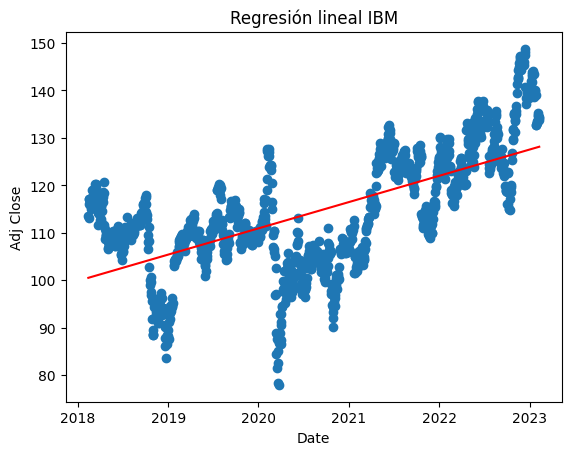

In [17]:
X = pd.to_datetime(ibm['Date']).apply(lambda x: x.toordinal())
y = ibm['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(ibm['Date']), y)
plt.plot(pd.to_datetime(ibm['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal IBM')
plt.show()

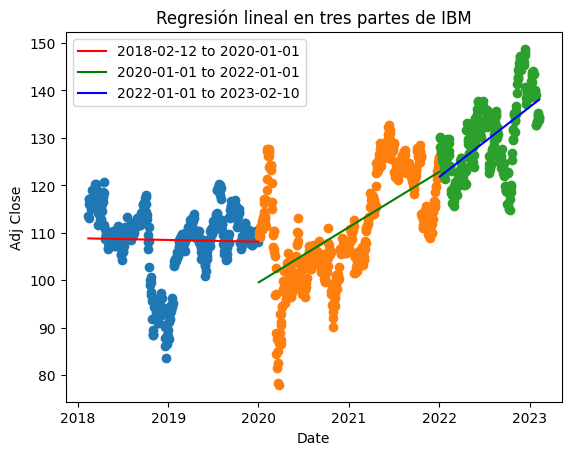

In [18]:
#crear los tres subconjuntos del DataFrame

ibm1 = ibm.loc[(ibm['Date'] >= '2018-02-12') & (ibm['Date'] <= '2020-01-01')]
ibm2 = ibm.loc[(ibm['Date'] > '2020-01-01') & (ibm['Date'] <= '2022-01-01')]
ibm3 = ibm.loc[(ibm['Date'] > '2022-01-01') & (ibm['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(ibm1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(ibm2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(ibm3['Date']).apply(lambda x: x.toordinal())

y1 = ibm1['Adj Close']
y2 = ibm2['Adj Close']
y3 = ibm3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(ibm1['Date']), y1)
plt.plot(pd.to_datetime(ibm1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(ibm2['Date']), y2)
plt.plot(pd.to_datetime(ibm2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(ibm3['Date']), y3)
plt.plot(pd.to_datetime(ibm3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de IBM')
plt.legend()
plt.show()

In [20]:
ibm['Date'] = pd.to_datetime(ibm['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = ibm.loc[ibm['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = ibm.loc[ibm['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2022-12-13 00:00:00
Fecha de mínimo Adj Close: 2020-03-23 00:00:00


#Intel

In [15]:
from google.colab import files
import io as io
upload=files.upload()

Saving INTC.csv to INTC.csv


In [16]:
intc = pd.read_csv('INTC.csv')

In [23]:
intc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,44.150002,45.160000,44.090000,44.830002,38.820560,28379500
1,2018-02-13,44.590000,44.779999,44.259998,44.459999,38.500153,19517600
2,2018-02-14,44.070000,45.509998,44.040001,45.380001,39.296825,19922000
3,2018-02-15,45.880001,45.990002,44.950001,45.919998,39.764435,23536800
4,2018-02-16,45.820000,46.590000,45.509998,45.560001,39.452698,21475200


In [24]:
intc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-02-03,29.620001,31.170000,29.530001,30.320000,29.955000,57603100
1254,2023-02-06,29.549999,29.650000,28.610001,28.690001,28.690001,48726400
1255,2023-02-07,28.650000,29.270000,28.430000,29.049999,29.049999,50780800
1256,2023-02-08,28.950001,29.120001,28.209999,28.240000,28.240000,36479100
1257,2023-02-09,28.680000,28.820000,27.570000,27.730000,27.730000,43906400


In [25]:
intc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,49.616804,50.230398,49.008752,49.619984,45.500763,3.015584e+07
std,9.013934,9.096448,8.938754,9.021883,7.881189,1.505046e+07
min,24.730000,25.480000,24.590000,25.040001,24.408895,6.313200e+06
25%,46.509998,47.182500,45.912499,46.577500,41.832864,2.045715e+07
50%,50.509998,51.174999,49.930000,50.600001,45.866608,2.714560e+07
75%,55.277499,55.950001,54.754999,55.384999,50.980150,3.577740e+07
max,68.199997,69.290001,67.309998,68.470001,63.608189,1.822699e+08


In [26]:
intc.shape

(1258, 7)

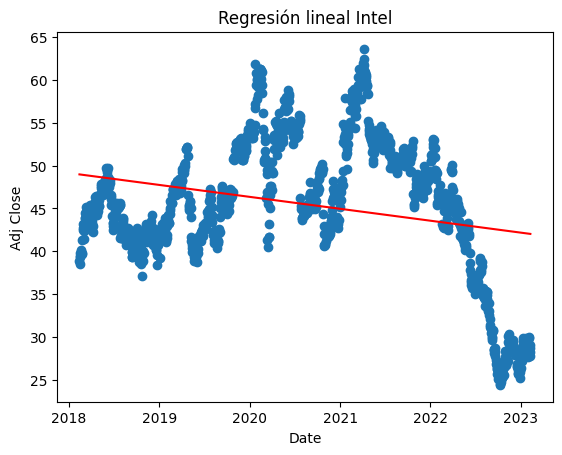

In [27]:
#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(intc['Date']).apply(lambda x: x.toordinal())
y = intc['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(intc['Date']), y)
plt.plot(pd.to_datetime(intc['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

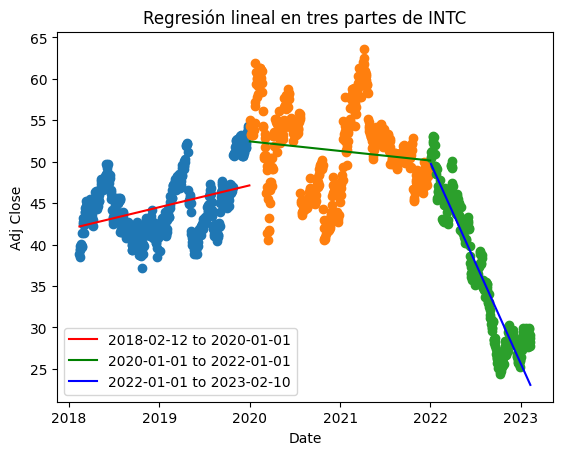

In [29]:
#crear los tres subconjuntos del DataFrame

intc1 = intc.loc[(intc['Date'] >= '2018-02-12') & (intc['Date'] <= '2020-01-01')]
intc2 = intc.loc[(intc['Date'] > '2020-01-01') & (intc['Date'] <= '2022-01-01')]
intc3 = intc.loc[(intc['Date'] > '2022-01-01') & (intc['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(intc1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(intc2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(intc3['Date']).apply(lambda x: x.toordinal())

y1 = intc1['Adj Close']
y2 = intc2['Adj Close']
y3 = intc3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(intc1['Date']), y1)
plt.plot(pd.to_datetime(intc1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(intc2['Date']), y2)
plt.plot(pd.to_datetime(intc2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(intc3['Date']), y3)
plt.plot(pd.to_datetime(intc3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de INTC')
plt.legend()
plt.show()


In [30]:
intc['Date'] = pd.to_datetime(intc['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = intc.loc[intc['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = intc.loc[intc['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2021-04-09 00:00:00
Fecha de mínimo Adj Close: 2022-10-11 00:00:00


# Meta

In [17]:
from google.colab import files
import io as io
upload=files.upload()

Saving META.csv to META.csv


In [18]:
META = pd.read_csv('META.csv')

In [34]:
META.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,177.059998,177.550003,171.839996,176.410004,176.410004,32092100
1,2018-02-13,175.619995,175.970001,173.100006,173.149994,173.149994,21809400
2,2018-02-14,173.449997,179.809998,173.210007,179.520004,179.520004,28929700
3,2018-02-15,180.500000,180.500000,176.839996,179.960007,179.960007,20922100
4,2018-02-16,178.990005,179.880005,176.300003,177.360001,177.360001,20645300


In [35]:
META.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-02-03,183.470001,196.770004,182.889999,186.529999,186.529999,76809700
1254,2023-02-06,186.529999,190.699997,185.520004,186.059998,186.059998,42483800
1255,2023-02-07,185.580002,193.779999,184.399994,191.619995,191.619995,47080700
1256,2023-02-08,190.000000,190.830002,182.919998,183.429993,183.429993,36139100
1257,2023-02-09,186.130005,186.649994,177.270004,177.919998,177.919998,37118800


In [36]:
META.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,217.058736,220.129746,214.129690,217.149984,217.149984,2.434524e+07
std,67.623524,68.174097,66.975913,67.584611,67.584611,1.720388e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,6.046300e+06
25%,167.862503,171.135002,165.660004,168.785000,168.785000,1.493712e+07
50%,194.720001,197.394996,192.169998,194.595001,194.595001,2.010825e+07
75%,267.930008,270.452499,263.959999,266.937508,266.937508,2.826440e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,2.323166e+08


In [37]:
META.shape

(1258, 7)

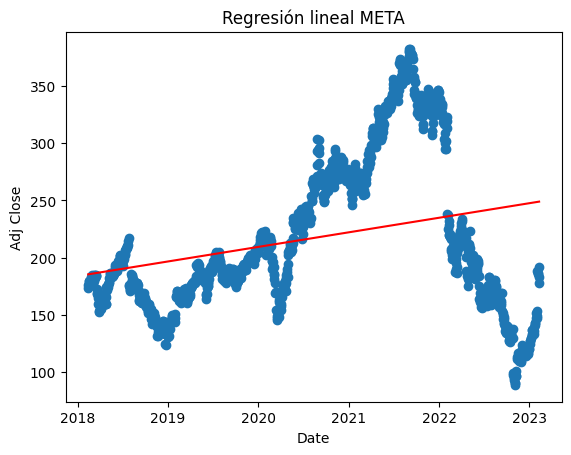

In [38]:
#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(META['Date']).apply(lambda x: x.toordinal())
y = META['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(META['Date']), y)
plt.plot(pd.to_datetime(META['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal META')
plt.show()

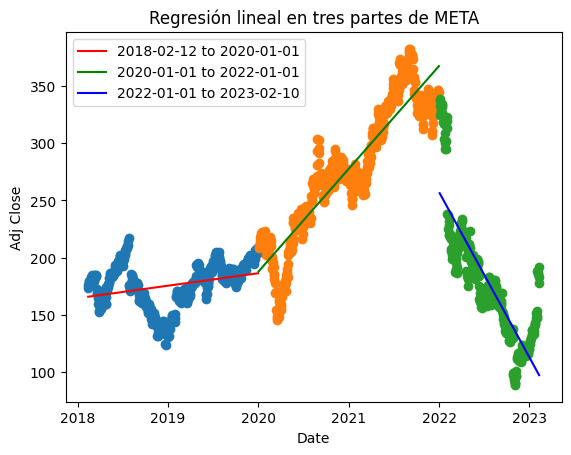

In [39]:
#crear los tres subconjuntos del DataFrame

META1 = META.loc[(META['Date'] >= '2018-02-12') & (META['Date'] <= '2020-01-01')]
META2 = META.loc[(META['Date'] > '2020-01-01') & (META['Date'] <= '2022-01-01')]
META3 = META.loc[(META['Date'] > '2022-01-01') & (META['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(META1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(META2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(META3['Date']).apply(lambda x: x.toordinal())

y1 = META1['Adj Close']
y2 = META2['Adj Close']
y3 = META3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(META1['Date']), y1)
plt.plot(pd.to_datetime(META1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(META2['Date']), y2)
plt.plot(pd.to_datetime(META2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(META3['Date']), y3)
plt.plot(pd.to_datetime(META3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de META')
plt.legend()
plt.show()

In [40]:
META['Date'] = pd.to_datetime(META['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = META.loc[META['Adj Close'].idxmax()]['Date']


#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close


min_date = META.loc[META['Adj Close'].idxmin()]['Date']


print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2021-09-07 00:00:00
Fecha de mínimo Adj Close: 2022-11-03 00:00:00


# Tencent

In [19]:
from google.colab import files
import io as io
upload=files.upload()

Saving TCEHY.csv to TCEHY.csv


In [20]:
TCEHY = pd.read_csv('TCEHY.csv')

In [43]:
TCEHY.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,53.099998,54.029999,52.700001,53.549999,50.075146,4801400
1,2018-02-13,53.939999,54.869999,53.750000,54.799999,51.244034,3335300
2,2018-02-14,54.799999,56.980000,54.720001,56.580002,52.908527,5175700
3,2018-02-15,58.549999,59.180000,57.299999,58.619999,54.816154,4495400
4,2018-02-16,58.240002,58.930000,57.900002,58.220001,54.442112,2692700


In [44]:
TCEHY.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-02-03,48.740002,49.119999,48.160000,48.250000,48.250000,3724400
1254,2023-02-06,47.889999,48.020000,47.119999,47.860001,47.860001,3606100
1255,2023-02-07,48.310001,48.380001,47.520000,48.279999,48.279999,4123500
1256,2023-02-08,48.730000,48.740002,47.959999,48.230000,48.230000,3208700
1257,2023-02-09,50.400002,50.639999,49.970001,50.230000,50.230000,3487300


In [45]:
TCEHY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,53.696582,54.227130,53.112305,53.707790,50.638511,4.213812e+06
std,14.158630,14.276202,13.978890,14.164865,13.355754,2.601805e+06
min,25.719999,25.879999,24.750000,25.680000,24.375839,5.726000e+05
25%,42.950001,43.255000,42.527500,42.869999,40.289261,2.613050e+06
50%,49.570002,49.985001,49.099998,49.570002,46.792162,3.576900e+06
75%,61.560001,62.537499,60.852501,61.847499,58.429966,5.086375e+06
max,99.010002,99.400002,98.430000,99.099998,93.374161,2.720330e+07


In [46]:
TCEHY.shape

(1258, 7)

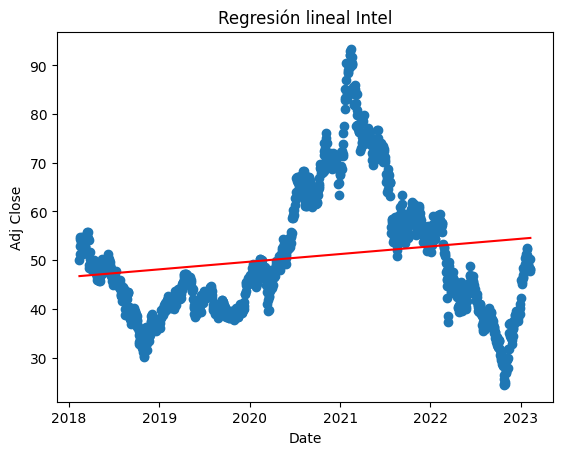

In [47]:
#crear la matriz de características X y la variable objetivo y


X = pd.to_datetime(TCEHY['Date']).apply(lambda x: x.toordinal())
y = TCEHY['Adj Close']


#ajustar el modelo de regresión lineal


model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)


#obtener los coeficientes de la regresión


coef = model.coef_
intercept = model.intercept_


#graficar la línea de la regresión junto con los puntos originales del DataFrame


plt.scatter(pd.to_datetime(TCEHY['Date']), y)
plt.plot(pd.to_datetime(TCEHY['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()


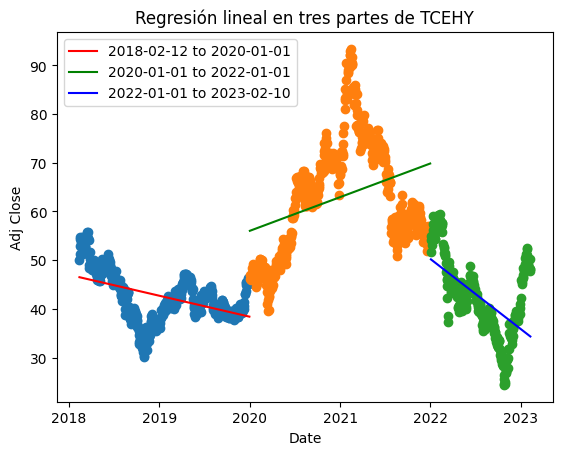

In [48]:
#crear los tres subconjuntos del DataFrame


TCEHY1 = TCEHY.loc[(TCEHY['Date'] >= '2018-02-12') & (TCEHY['Date'] <= '2020-01-01')]
TCEHY2 = TCEHY.loc[(TCEHY['Date'] > '2020-01-01') & (TCEHY['Date'] <= '2022-01-01')]
TCEHY3 = TCEHY.loc[(TCEHY['Date'] > '2022-01-01') & (TCEHY['Date'] <= '2023-02-10')]


#crear las matrices de características X y la variable objetivo y para cada subconjunto


X1 = pd.to_datetime(TCEHY1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(TCEHY2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(TCEHY3['Date']).apply(lambda x: x.toordinal())


y1 = TCEHY1['Adj Close']
y2 = TCEHY2['Adj Close']
y3 = TCEHY3['Adj Close']


#ajustar el modelo de regresión lineal para cada subconjunto


model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)


model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)


model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)


#obtener los coeficientes de cada regresión


coef1 = model1.coef_
intercept1 = model1.intercept_


coef2 = model2.coef_
intercept2 = model2.intercept_


coef3 = model3.coef_
intercept3 = model3.intercept_


#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto


plt.scatter(pd.to_datetime(TCEHY1['Date']), y1)
plt.plot(pd.to_datetime(TCEHY1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')


plt.scatter(pd.to_datetime(TCEHY2['Date']), y2)
plt.plot(pd.to_datetime(TCEHY2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')


plt.scatter(pd.to_datetime(TCEHY3['Date']), y3)
plt.plot(pd.to_datetime(TCEHY3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')


plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de TCEHY')
plt.legend()
plt.show()

In [49]:
TCEHY['Date'] = pd.to_datetime(TCEHY['Date'])


#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close


max_date = TCEHY.loc[TCEHY['Adj Close'].idxmax()]['Date']


#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close


min_date = TCEHY.loc[TCEHY['Adj Close'].idxmin()]['Date']


print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2021-02-12 00:00:00
Fecha de mínimo Adj Close: 2022-10-24 00:00:00


# Oracle

In [21]:
from google.colab import files
import io as io
upload=files.upload()

Saving ORCL.csv to ORCL.csv


In [22]:
ORCL = pd.read_csv('ORCL.csv')

In [52]:
ORCL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,48.220001,48.490002,47.720001,48.150002,44.330383,16261600
1,2018-02-13,48.009998,48.680000,47.770000,48.490002,44.643421,12633100
2,2018-02-14,48.189999,49.520000,48.139999,49.450001,45.527256,14271400
3,2018-02-15,49.700001,50.689999,49.430000,50.639999,46.622849,14132500
4,2018-02-16,50.549999,51.139999,50.490002,50.709999,46.687305,11098800


In [53]:
ORCL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-02-03,88.470001,90.260002,88.269997,89.620003,89.620003,5671800
1254,2023-02-06,89.510002,89.610001,88.400002,88.529999,88.529999,4097200
1255,2023-02-07,87.870003,88.019997,86.300003,87.739998,87.739998,9226000
1256,2023-02-08,86.930000,87.919998,86.510002,86.690002,86.690002,7624400
1257,2023-02-09,87.139999,87.900002,86.330002,86.650002,86.650002,4960300


In [54]:
ORCL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,63.695469,64.389889,63.089293,63.728688,61.420250,1.260758e+07
std,14.928976,15.082920,14.760126,14.915254,15.624611,7.388045e+06
min,41.119999,43.400002,39.709999,39.799999,37.887901,2.754900e+06
25%,52.402501,52.939999,51.959999,52.325000,49.268488,7.719150e+06
50%,57.000000,57.490002,56.419998,56.899999,54.460375,1.080755e+07
75%,76.942497,77.797499,76.140004,77.025002,75.748518,1.520698e+07
max,104.290001,106.339996,102.279999,103.650002,101.501648,6.860100e+07


In [55]:
ORCL.shape

(1258, 7)

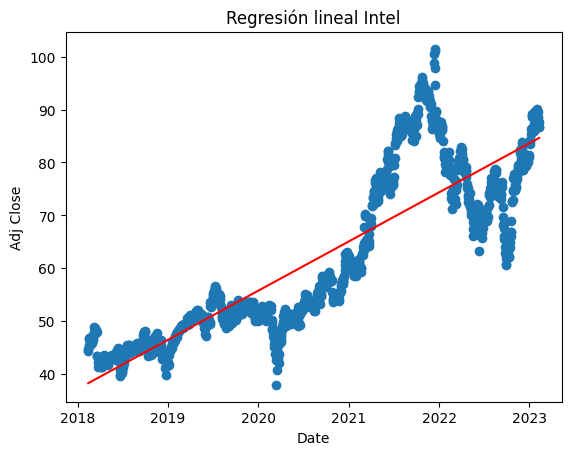

In [56]:
#crear la matriz de características X y la variable objetivo y


X = pd.to_datetime(ORCL['Date']).apply(lambda x: x.toordinal())
y = ORCL['Adj Close']


#ajustar el modelo de regresión lineal


model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)


#obtener los coeficientes de la regresión


coef = model.coef_
intercept = model.intercept_


#graficar la línea de la regresión junto con los puntos originales del DataFrame


plt.scatter(pd.to_datetime(ORCL['Date']), y)
plt.plot(pd.to_datetime(ORCL['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

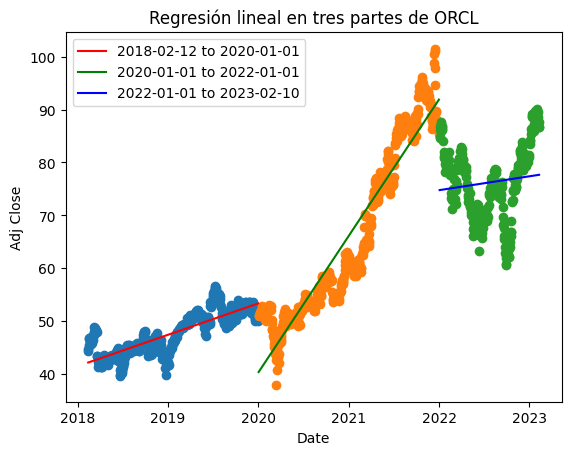

In [57]:
#crear los tres subconjuntos del DataFrame


ORCL1 = ORCL.loc[(ORCL['Date'] >= '2018-02-12') & (ORCL['Date'] <= '2020-01-01')]
ORCL2 = ORCL.loc[(ORCL['Date'] > '2020-01-01') & (ORCL['Date'] <= '2022-01-01')]
ORCL3 = ORCL.loc[(ORCL['Date'] > '2022-01-01') & (ORCL['Date'] <= '2023-02-10')]


#crear las matrices de características X y la variable objetivo y para cada subconjunto


X1 = pd.to_datetime(ORCL1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(ORCL2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(ORCL3['Date']).apply(lambda x: x.toordinal())


y1 = ORCL1['Adj Close']
y2 = ORCL2['Adj Close']
y3 = ORCL3['Adj Close']


#ajustar el modelo de regresión lineal para cada subconjunto


model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)


model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)


model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)


#obtener los coeficientes de cada regresión


coef1 = model1.coef_
intercept1 = model1.intercept_


coef2 = model2.coef_
intercept2 = model2.intercept_


coef3 = model3.coef_
intercept3 = model3.intercept_


#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto


plt.scatter(pd.to_datetime(ORCL1['Date']), y1)
plt.plot(pd.to_datetime(ORCL1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')


plt.scatter(pd.to_datetime(ORCL2['Date']), y2)
plt.plot(pd.to_datetime(ORCL2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')


plt.scatter(pd.to_datetime(ORCL3['Date']), y3)
plt.plot(pd.to_datetime(ORCL3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')


plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de ORCL')
plt.legend()
plt.show()

In [58]:
ORCL['Date'] = pd.to_datetime(ORCL['Date'])


#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close


max_date = ORCL.loc[ORCL['Adj Close'].idxmax()]['Date']


#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close


min_date = ORCL.loc[ORCL['Adj Close'].idxmin()]['Date']


print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2021-12-15 00:00:00
Fecha de mínimo Adj Close: 2020-03-12 00:00:00


# TSM

In [23]:
from google.colab import files
import io as io
upload=files.upload()

Saving TSM.csv to TSM.csv


In [24]:
TSM = pd.read_csv('TSM.csv')

In [61]:
TSM.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,42.029999,42.790001,41.959999,42.529999,36.581379,6573300
1,2018-02-13,42.540001,42.660000,41.880001,42.380001,36.452358,5831900
2,2018-02-14,42.169998,43.090000,41.919998,43.049999,37.028648,6860100
3,2018-02-15,43.520000,43.750000,42.750000,43.520000,37.432915,6116500
4,2018-02-16,43.349998,43.959999,43.310001,43.480000,37.398499,4792100


In [62]:
TSM.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2023-02-03,95.040001,96.949997,94.309998,94.660004,94.169785,12242200
1254,2023-02-06,91.800003,92.050003,90.739998,91.830002,91.354439,12425200
1255,2023-02-07,91.779999,94.699997,91.680000,94.550003,94.060349,15258900
1256,2023-02-08,95.019997,95.940002,94.230003,94.279999,93.791748,12899700
1257,2023-02-09,96.000000,98.570000,95.620003,96.690002,96.189270,16997400


In [63]:
TSM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,73.863673,74.670135,72.972870,73.805692,70.229331,9.676131e+06
std,31.766398,32.164116,31.235747,31.666221,31.889332,4.853372e+06
min,34.459999,35.029999,34.209999,34.360001,30.635014,2.320500e+06
25%,43.097500,43.742501,42.750000,43.204999,38.209031,6.524775e+06
50%,65.950001,67.005001,64.634998,65.564999,63.468301,8.491850e+06
75%,105.642502,106.242496,103.839998,105.032498,101.222584,1.152870e+07
max,141.610001,145.000000,139.419998,140.660004,136.974808,5.202000e+07


In [64]:
TSM.shape

(1258, 7)

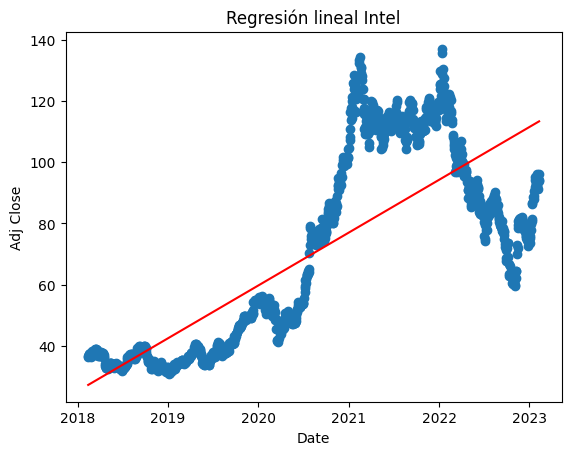

In [65]:
#crear la matriz de características X y la variable objetivo y


X = pd.to_datetime(TSM['Date']).apply(lambda x: x.toordinal())
y = TSM['Adj Close']


#ajustar el modelo de regresión lineal


model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)


#obtener los coeficientes de la regresión


coef = model.coef_
intercept = model.intercept_


#graficar la línea de la regresión junto con los puntos originales del DataFrame


plt.scatter(pd.to_datetime(TSM['Date']), y)
plt.plot(pd.to_datetime(TSM['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

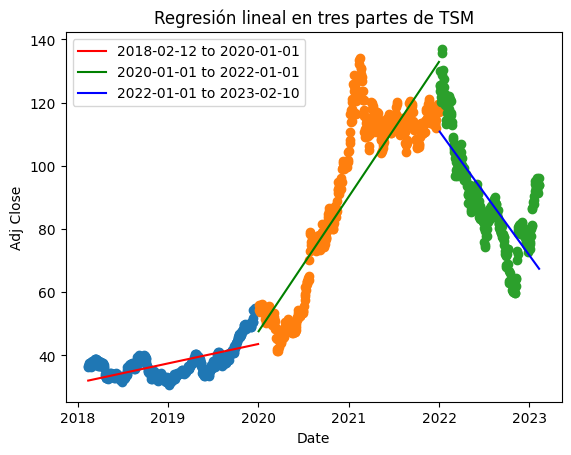

In [66]:
#crear los tres subconjuntos del DataFrame


TSM1 = TSM.loc[(TSM['Date'] >= '2018-02-12') & (TSM['Date'] <= '2020-01-01')]
TSM2 = TSM.loc[(TSM['Date'] > '2020-01-01') & (TSM['Date'] <= '2022-01-01')]
TSM3 = TSM.loc[(TSM['Date'] > '2022-01-01') & (TSM['Date'] <= '2023-02-10')]


#crear las matrices de características X y la variable objetivo y para cada subconjunto


X1 = pd.to_datetime(TSM1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(TSM2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(TSM3['Date']).apply(lambda x: x.toordinal())


y1 = TSM1['Adj Close']
y2 = TSM2['Adj Close']
y3 = TSM3['Adj Close']


#ajustar el modelo de regresión lineal para cada subconjunto


model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)


model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)


model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)


#obtener los coeficientes de cada regresión


coef1 = model1.coef_
intercept1 = model1.intercept_


coef2 = model2.coef_
intercept2 = model2.intercept_


coef3 = model3.coef_
intercept3 = model3.intercept_


#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto


plt.scatter(pd.to_datetime(TSM1['Date']), y1)
plt.plot(pd.to_datetime(TSM1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')


plt.scatter(pd.to_datetime(TSM2['Date']), y2)
plt.plot(pd.to_datetime(TSM2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')


plt.scatter(pd.to_datetime(TSM3['Date']), y3)
plt.plot(pd.to_datetime(TSM3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')


plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de TSM')
plt.legend()
plt.show()

In [67]:
TSM['Date'] = pd.to_datetime(TSM['Date'])


#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close


max_date = TSM.loc[TSM['Adj Close'].idxmax()]['Date']


#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close


min_date = TSM.loc[TSM['Adj Close'].idxmin()]['Date']


print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2022-01-14 00:00:00
Fecha de mínimo Adj Close: 2019-01-03 00:00:00


# EN CONJUNTO

In [35]:
tec=pd.DataFrame()
tec["Apple"]=apple["Adj Close"]
tec["Samsung"]=samsung["Adj Close"]
tec["Alphabet"]=alphabet["Adj Close"]
tec["Microsoft"]=msft["Adj Close"]
tec["IBM"]=ibm["Adj Close"]
tec["Intel"]=intc["Adj Close"]
tec["Meta"]=META["Adj Close"]
tec["Oracle"]=ORCL["Adj Close"]
tec["TCEHY"]=TCEHY["Adj Close"]
tec["TSM"]=TSM["Adj Close"]

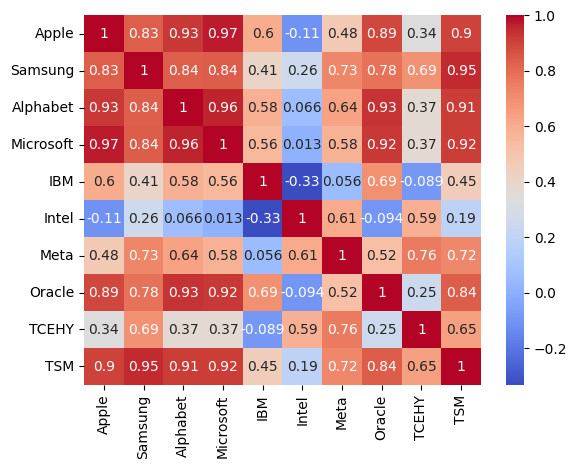

In [36]:
from numpy.lib import shape_base
# Calcular la matriz de correlación
corr_matrix = tec.corr()

# Crear un mapa de calor de la matriz de correlación
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Mostrar el mapa de calor
plt.show()